# Intro
The BCS theory describes the system as a gas of quasiparticles of energies $E_{k}$.  Quasiparticles are superpositions of particles and holes, such that $|v_{k}|^2$ is the probability of a particle with wave-vector $k$ and $|u_{k}|^2$ is the probability of a hole .
The equation that describes a uniform gas of electrons in a superconducting/superfluid state has the following form (so-called BCS equations):
\begin{equation}
\left( \begin{array}{cc}
\eta_{k} & \Delta \\
\Delta^\ast & -\eta_{k} \end{array} \right) \left( \begin{array}{c} u_{k} \\ v_{k} \end{array} \right)
=E_{k} \left( \begin{array}{c} u_{k} \\ v_{k} \end{array} \right) \;,
\label{BdGnonuniform}
\end{equation}
where $\eta_{k}={\frac{\hbar^2k^{2}}{2m}}-\mu$ is the energy of a free particle calculated with respect to the chemical potential $\mu$. The relation must be satisfied:
\begin{equation}
|v_{k}|^2 + |u_{k}|^2 =1,\label{eq:norm}
\end{equation}
which means that each state is occupied by one quasiparticle (also known as the Pauli principle). We can compute the number of particles in the system as:
\begin{equation}
N=2\sum_{k}|v_{k}|^2 f(-E_{k}),\label{eq:n}
\end{equation}
where the factor $2$ accounts for two spin projections ($\uparrow$ and $\downarrow$). The density of atoms is $n=N/V$, where $V$ is the volume of our system. The particles are distributed according to the Fermi-Dirac statistics:
\begin{equation}
f(E_{k}) = \frac{1}{e^{E_{k}/k_B T} +1}
\end{equation}
where $T$ is temperature and $k_B$ is the Boltzmann constant. 

The most important quantity in the BCS theory is the energy gap (also known as "gap parameter") $\Delta$. If $\Delta>0$ then the system is in the superconducting state. It can be shown that this condition is equivalent to the appearance of Cooper pairs in the system: a quantum correlation between particles in states $(k,\uparrow)$ and $(-k,\downarrow)$, so that the energy required to break the pair is $E_{\textrm{breaking}}= \Delta$. Such correlated states can propagate in the system without energy losses (scatterings). If $\Delta=0$, then the system is in the normal state. The energy gap is computed as follows:

\begin{equation}
\Delta = \frac{g}{2V}\sum_{k} u_{k}v_{k}(1-2f(E_{k})).
\end{equation}
The coupling constant is related to the scattering lenght
\begin{equation}
\frac{1}{g}=-\frac{m}{4\pi\hbar^2 a}+\frac{k_c m}{2\pi^2\hbar^2}-\frac{k_F m}{4\pi^2\hbar^2}\ln\left(\frac{k_c+k_F}{k_c-k_F}\right)
\end{equation}

# Solutions of BCS equations

Let us define:
\begin{equation}
E_{k}=\sqrt{\eta_{k}^2 + \Delta^2},\label{eq:Ek}
\end{equation}
and 
\begin{equation}
A_{k}=\frac{1}{2}\left(1+\frac{\eta_{k}}{E_{k}}\right)
\end{equation}
It can be shown that the two solutions are:
1. For a positive eigenvalue $E^{(+)}_{k}=+E_{k}$, the corresponding eigenvector obeys
\begin{equation}
u_{k}^{(+)}=\sqrt{A_{k}}\;; \;\;\;\;\; 
v_{k}^{(+)}=\sqrt{1-A_{k}} \;.\label{eq:E1}
\end{equation}
2. For a negative eigenvalue $E^{(-)}_{k}=-E_{k}$, the corresponding eigenvector obeys
\begin{equation}
u_{k}^{(-)}=\sqrt{1-A_{k}}\;; \;\;\;\;\; 
v_{k}^{(-)}=-\sqrt{A_{k}} \;.\label{eq:E2}
\end{equation}


By recalling that $\eta_{k}={\frac{\hbar^2k^{2}}{2m}}-\mu$, we recognize that a positive value of quasiparticle energy corresponds to a state above the Fermi surface, while negative indicates the state below the Fermi surface. (For zero temperature Fermi energy equals the chemical potential, $\varepsilon_F(T=0)= \mu$.)
Note that the solutions depend on $\Delta$, which in turn depends on the solutions $\{u_k,v_k\}$. On top of this, we look for a solution that represents a gas of a given density $n_0$. Thus we search for $\Delta$ (energy gap) and $\mu$ (chemical potential) so that all the above equations are satisfied. 

# Self-consitent solution

To find the solution of BCS equations, set initial values for $\Delta$ and $\mu$ and follow the protocol:
1. Solve BCS equations: find all $\{u_k,v_k\}$ and $E_k$.
2. Compute the corresponding density $n=N/V$ and corresponding $\Delta$. The value of the $\Delta$ that you obtain in this step will be referred to as $\Delta_{new}$.
3. Check the difference between $\Delta$ and $\Delta_{new}$, and between $n_0$ and $n=N/V$. If $|\Delta-\Delta_{new}|<\varepsilon_\Delta$, and $|n_0-n|<\varepsilon_n$, where $\varepsilon_{\Delta/n}$ is the tolerance (algorithm parameter)  then we have convergence, and we can stop the algorithm.
4. Update the chemical potential according to the prescription: 
\begin{equation}
\label{eq:chempot}
\mu \leftarrow \mu+\alpha_\mu(n_0-n),
\end{equation}
where $\alpha_\mu$ is the algorithm parameter.
5. Update the $\Delta$ according mixing prescription
\begin{equation}
\Delta\leftarrow \beta_\Delta\Delta_{new} + (1-\beta_\Delta)\Delta,
\end{equation}
where $\beta_\Delta$ is the algorithm parameter (typically $\beta_\Delta \approx 0.5$ provides the best performance), and go back to step 1.


# Simple BCS code

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Constants
m=1.0     # mass of dimer (two particles) 
hbar=1.0  # h/2pi
kB=1.0    # Boltzmann constant
kc=np.pi  # momentum cut-off
L=32      # box length
V=L**3    # volume

# Domain - momentum space
kxv = np.arange(-np.pi, np.pi*1.01, 2.*np.pi/L)
kyv = np.arange(-np.pi, np.pi*1.01, 2.*np.pi/L)
kzv = np.arange(-np.pi, np.pi*1.01, 2.*np.pi/L)

# in equations there is k^2 only
k2v=[]
for kx in kxv:
    for ky in kyv:
        for kz in kzv:
            k2 = kx**2 + ky**2 + kz**2
            
            if k2>kc**2: # skip if momentum is above the cut-off scale 
                continue
                
            k2v.append(k2)
k2v=np.array(k2v)

print("Number of states with k<kc is", len(k2v))

Number of states with k<kc is 17074


In [3]:
def fFD(E,T):
    r=np.ones(E.shape)
    x=E/(kB*T)
    for i in range(len(x)):
        if x[i]>50.0: r[i]=0.0
        elif x[i]<-50.0: r[i]=1.0
        else: r[i]=1.0/(np.exp(x[i])+1.0)
    return r

In [4]:
# simple extra functions
def kF(n):
    return (3.*np.pi**2*n)**(1./3.)
def eF(n):
    return hbar**2*kF(n)**2/(2.*m)

In [5]:
# solver of bcs equations
def solve_bcs(delta, mu, a_s, n0, T, alpha=0.5, beta=0.5, epsd=1.0e-6, epsn=1.0e-6, maxiters=10000):
    if T<1.0e-8: T=1.0e-8 # to avoid division by zero in Fermi-Dirac function
    
    # coupling constant - in medium regularized
    ginv=-1.*m/(4.*np.pi*hbar**2*a_s)+ m*kc/(2.*np.pi**2*hbar**2)- m*kF(n0)/(4.*np.pi**2*hbar**2)*np.log((kc+kF(n0))/(kc-kF(n0)))
    g=1.0/ginv

    
    for it in range(maxiters):
        etak=hbar**2*k2v/(2.*m)-mu
        Ek=np.sqrt(etak**2 + delta**2)
        Ak=0.5*(1.0+etak/Ek)

        # Step 1: solve BCS equations
        ## solutions with positive energies
        Ekp = Ek
        ukp=np.sqrt(Ak)
        vkp=np.sqrt(1.0-Ak)
        ## solutions with negative energies
        Ekm = -1.0*Ek
        ukm=np.sqrt(1.0-Ak)
        vkm=-1.0*np.sqrt(Ak)

        # Step 2: compute density and delta                   
        N= 2.0*np.sum(vkp**2*fFD(-1.0*Ekp,T)) # contributions from positive energy solutions
        N+=2.0*np.sum(vkm**2*fFD(-1.0*Ekm,T)) # contributions from negative energy solutions
        n=N/V

        delta_new= (g/V/2)*np.sum(ukp*vkp*(1.-2.*fFD(Ekp,T))) # contributions from positive energy solutions
        delta_new+=(g/V/2)*np.sum(ukm*vkm*(1.-2.*fFD(Ekm,T))) # contributions from positive energy solutions
  
        # Step 3: check convergence
        d_delta=np.abs(delta_new-delta)
        d_n=np.abs(n0-n)
        print("[%8d] delta=%10.6f; n=%10.6f; d_delta=%10.6g; d_n=%10.6g" % (it, delta_new, n, d_delta, d_n), end='\r')
        if d_delta<epsd and d_n<epsn: # we have convergence
            break

        # Step 4: update chemical potential
        mu = mu + alpha*(n0-n)

        # Step 5: update delta
        delta = beta*delta_new + (1.0-beta)*delta
        
    # print final result
    print("[%11d] delta=%10.6f; n=%10.6f; d_delta=%10.6g; d_n=%10.6g" % (it, delta_new, n, d_delta, d_n), end='\r')
    if it==maxiters-1:
        print("NO CONVERGED!")
    else:
        print("CONVERGED!   ")
        
    nk=vkp**2*fFD(-1.0*Ekp,T)+vkm**2*fFD(-1.0*Ekm,T) # occupation probabilities
    return delta, mu, n, nk

# Delta vs scattering length

In [6]:
a_sv = np.linspace(-1.0, -0.2, 10) # scattering length
N=1000   # number of atoms
T=0.0       # temperature
n=N/V
delta=0.1
mu=eF(n)

akF=[]
delta_per_eF=[]
for a_s in a_sv:
    # solve problem
    delta, mu, n, nk = solve_bcs(delta, mu, a_s, n, T, alpha=0.5, beta=0.5, epsd=1.0e-6, epsn=1.0e-6, maxiters=10000)
    # save data
    akF.append(a_s*kF(n))
    delta_per_eF.append(delta/eF(n))

CONVERGED!    delta=  0.094110; n=  0.030519; d_delta=7.61682e-07; d_n=9.8579e-07
CONVERGED!    delta=  0.080903; n=  0.030518; d_delta=7.13214e-07; d_n=9.85522e-07
CONVERGED!    delta=  0.067151; n=  0.030517; d_delta=7.24038e-07; d_n=9.88928e-07
CONVERGED!    delta=  0.053169; n=  0.030516; d_delta=8.04025e-07; d_n=9.82019e-07
CONVERGED!    delta=  0.039584; n=  0.030515; d_delta=9.92089e-07; d_n=9.25114e-07
CONVERGED!    delta=  0.027279; n=  0.030514; d_delta= 9.462e-07; d_n=5.65209e-07
CONVERGED!    delta=  0.016856; n=  0.030514; d_delta=9.45105e-07; d_n=3.33543e-07
CONVERGED!    delta=  0.008915; n=  0.030513; d_delta=9.91999e-07; d_n=5.14441e-07
CONVERGED!    delta=  0.004236; n=  0.030512; d_delta=1.96187e-07; d_n=9.39656e-07
CONVERGED!    delta=  0.002005; n=  0.030512; d_delta=8.70455e-07; d_n=3.36459e-07


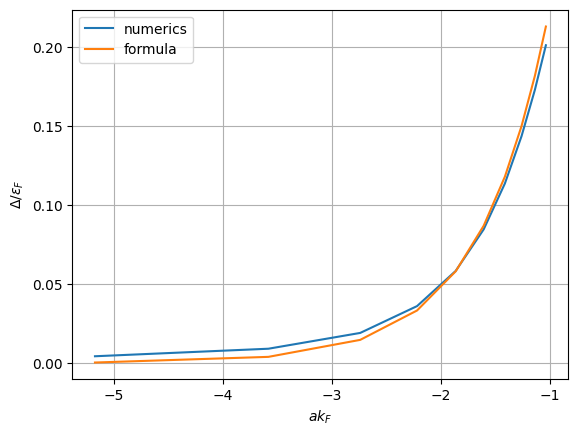

In [7]:
# plot results 
akF=np.array(akF)
delta_formula=8.0/np.exp(1.0)**2 * np.exp(np.pi / (2.0*akF))

fig, ax = plt.subplots()
ax.plot(1.0/akF, np.array(delta_per_eF), label="numerics")
ax.plot(1.0/akF, delta_formula, label="formula")
ax.set(xlabel=r'$ak_F$', ylabel=r'$\Delta/\varepsilon_F$')
ax.grid()
plt.legend()
plt.show()

# Delta vs temperature

In [8]:
a_s=-1.0  # Scattering lenght
N=1000   # number of atoms
n=N/V
Tv=np.linspace(0,0.15*eF(n)/kB,30) # temperatures
delta=0.1
mu=eF(n)

kBT_per_eF=[]
delta_per_eF=[]
mu_per_eF=[]
for T in Tv:
    # solve problem
    delta, mu, n, nk = solve_bcs(delta, mu, a_s, n, T, alpha=0.5, beta=0.5, epsd=1.0e-6, epsn=1.0e-6, maxiters=10000)
    # save data
    kBT_per_eF.append(kB*T/eF(n))
    delta_per_eF.append(delta/eF(n))
    mu_per_eF.append(mu/eF(n))

CONVERGED!    delta=  0.094110; n=  0.030519; d_delta=7.61682e-07; d_n=9.8579e-07
CONVERGED!    delta=  0.094111; n=  0.030519; d_delta=6.1535e-07; d_n=         0
CONVERGED!    delta=  0.094111; n=  0.030519; d_delta=6.15375e-07; d_n=6.47097e-13
CONVERGED!    delta=  0.094111; n=  0.030519; d_delta=6.38507e-07; d_n=6.26962e-10
CONVERGED!    delta=  0.094108; n=  0.030519; d_delta=9.80783e-07; d_n=3.74842e-08
CONVERGED!    delta=  0.094083; n=  0.030518; d_delta=8.94902e-07; d_n=4.33697e-07
CONVERGED!    delta=  0.093991; n=  0.030517; d_delta=4.97666e-07; d_n=9.75831e-07
CONVERGED!    delta=  0.093777; n=  0.030516; d_delta=2.36542e-07; d_n=9.83506e-07
CONVERGED!    delta=  0.093382; n=  0.030515; d_delta=4.41786e-07; d_n=9.66102e-07
CONVERGED!    delta=  0.092749; n=  0.030514; d_delta=5.45047e-07; d_n=9.52223e-07
CONVERGED!    delta=  0.091827; n=  0.030513; d_delta=6.21713e-07; d_n=9.46118e-07
CONVERGED!    delta=  0.090572; n=  0.030512; d_delta=7.17712e-07; d_n=9.87966e-07
CONVERG

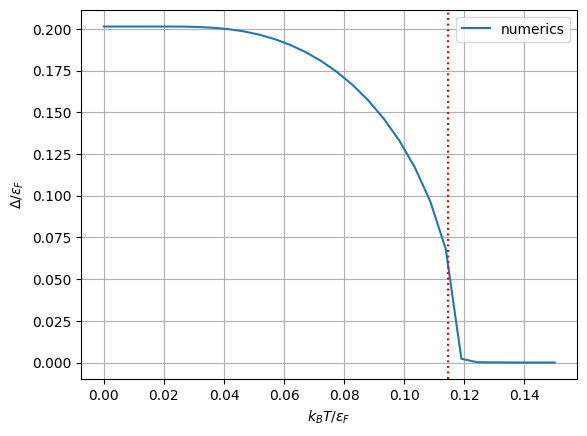

In [9]:
# plot results 

# Expectation for Tc
Tc=delta_per_eF[0]/1.76

# delta vs temperature
fig, ax = plt.subplots()
ax.plot(kBT_per_eF, delta_per_eF, label="numerics")
plt.axvline(x=Tc, color="r", linestyle=':')
ax.set(xlabel=r'$k_BT/\varepsilon_F$', ylabel=r'$\Delta/\varepsilon_F$')
ax.grid()
plt.legend()
plt.show()

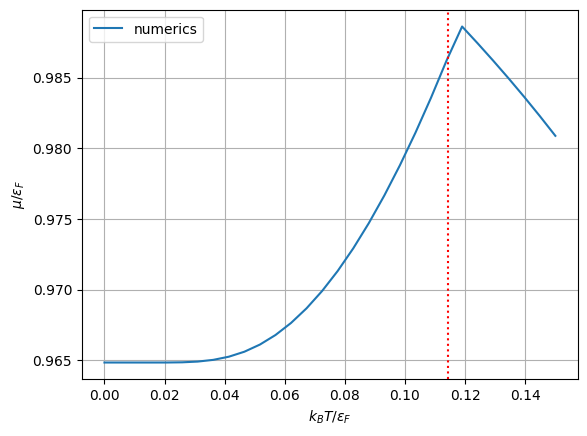

In [10]:
# Chemical potential vs temperature
fig, ax = plt.subplots()
ax.plot(kBT_per_eF, mu_per_eF, label="numerics")
plt.axvline(x=Tc, color="r", linestyle=':')
ax.set(xlabel=r'$k_BT/\varepsilon_F$', ylabel=r'$\mu/\varepsilon_F$')
ax.grid()
plt.legend()
plt.show()

# Occupation probabilities

In [11]:
a_s=-1.0  # Scattering lenght
N=1000   # number of atoms
n=N/V
delta=0.1
mu=eF(n)

T=0.0 # temperature
delta0, mu0, n0, nk0 = solve_bcs(delta, mu, a_s, n, T, alpha=0.5, beta=0.5, epsd=1.0e-6, epsn=1.0e-6, maxiters=10000)

T=0.2*eF(n)/kB # temperature
delta1, mu1, n1, nk1 = solve_bcs(delta, mu, a_s, n, T, alpha=0.5, beta=0.5, epsd=1.0e-6, epsn=1.0e-6, maxiters=10000)

CONVERGED!    delta=  0.094110; n=  0.030519; d_delta=7.61682e-07; d_n=9.8579e-07
CONVERGED!    delta=  0.000007; n=  0.030518; d_delta=9.50305e-07; d_n=4.58599e-07


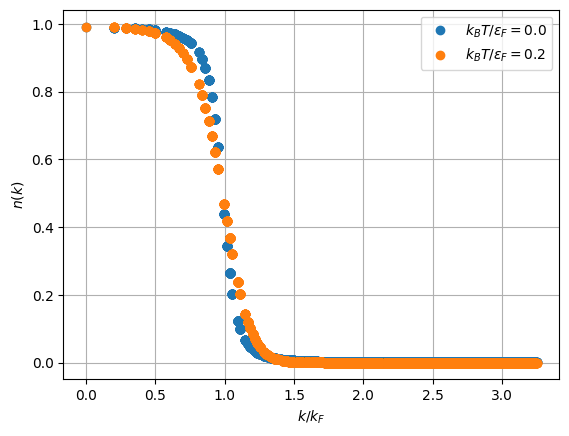

In [12]:
# plot occupation probabilities
fig, ax = plt.subplots()
ax.plot(np.sqrt(k2v)/kF(n0), nk0, 'o', label=r'$k_B T/\varepsilon_F=0.0$')
ax.plot(np.sqrt(k2v)/kF(n1), nk1, 'o', label=r'$k_B T/\varepsilon_F=0.2$')
ax.set(xlabel=r'$k/k_F$', ylabel=r'$n(k)$')
ax.grid()
plt.legend()
plt.show()

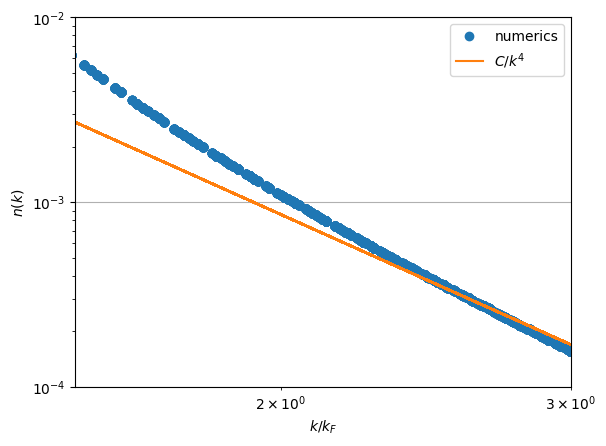

In [13]:
# plot occupation probabilities
C=0.012
nk_tail = C / k2v**2

fig, ax = plt.subplots()
ax.plot(np.sqrt(k2v)/kF(n0), nk0, 'o', label=r'numerics')
ax.plot(np.sqrt(k2v)/kF(n0), nk_tail, label=r'$C/k^4$')
ax.set(xlabel=r'$k/k_F$', ylabel=r'$n(k)$')
ax.set_xlim([1.5,3.0])
ax.set_ylim([1.0e-4,1.0e-2])
plt.xscale("log")
plt.yscale("log")
ax.grid()
plt.legend()
plt.show()